<a href="https://colab.research.google.com/github/aroy1106/Machine-Learning/blob/main/KNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNN_Project_Data",index_col=0)
dataset.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# **Standardizing the independent values**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(dataset.drop('TARGET CLASS',axis=1))

StandardScaler()

In [ ]:
scaled_feat = scaler.transform(dataset.drop('TARGET CLASS',axis=1))

In [ ]:
new_dataset = pd.DataFrame(scaled_feat,columns=dataset.columns[:-1])

In [ ]:
new_dataset.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feat,dataset['TARGET CLASS'],test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
'knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K = 1')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))'

With K = 1
[[115  42]
 [ 36 107]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       157
           1       0.72      0.75      0.73       143

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



# **Choosing a K-Value**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error_Rate')

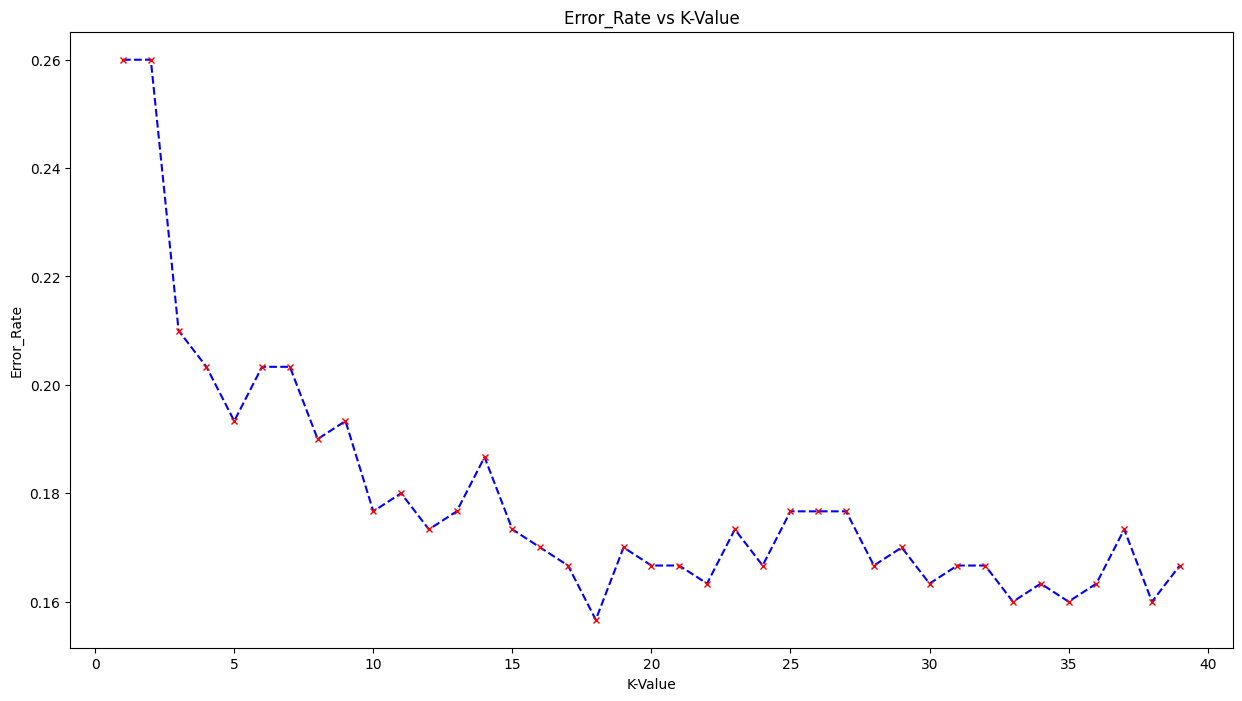

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='x',markeredgecolor='red', markersize=5)
plt.title('Error_Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error_Rate')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K = 18')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With K = 18
[[131  26]
 [ 21 122]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       157
           1       0.82      0.85      0.84       143

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K = 20')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With K = 20
[[120  26]
 [ 37 117]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       146
           1       0.82      0.76      0.79       154

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K = 21')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With K = 21
[[117  29]
 [ 28 126]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       146
           1       0.81      0.82      0.82       154

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [ ]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K = 22')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With K = 22
[[119  27]
 [ 35 119]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       146
           1       0.82      0.77      0.79       154

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [ ]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K = 39')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With K = 39
[[118  28]
 [ 29 125]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       146
           1       0.82      0.81      0.81       154

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K = 12')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With K = 12
[[124  22]
 [ 37 117]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       146
           1       0.84      0.76      0.80       154

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300

